## Imports

In [ ]:
import kagglehub

import pandasql as ps
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, hour, date_format

## Carregando Dados

In [3]:
spark = SparkSession.builder.appName('Exemplo2').config("spark.executor.cores", "4").getOrCreate()

In [4]:
# Download latest version
# path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
# print("Path to dataset files:", path)

df = spark.read.csv('/home/arthur/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv', header=True, inferSchema=True)

In [5]:
df.show()

25/01/19 17:22:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+-------+--------+-------------------+-------------------+------------------+------------------+-------+-------+------------+--------------------+--------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|  ID| Source|Severity|         Start_Time|           End_Time|         Start_Lat|         Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|A

## Descrição dos Dados

In [6]:
print(f"Número de Linhas: {df.count()}")
print(f"Número de Colunas: {len(df.columns)}")

Número de Linhas: 7728394
Número de Colunas: 46


### Identificação e Origem
ID: Identificador único para cada registro no dataset.

Source: Fonte ou sistema de onde os dados foram obtidos.

### Detalhes do Incidente
Severity: Nível de gravidade do incidente, geralmente representado por um número inteiro.

Start_Time: Data e hora de início do incidente.

End_Time: Data e hora de término do incidente.

Description: Descrição textual do incidente.

### Localização Geográfica
Start_Lat: Latitude do ponto inicial do incidente.

Start_Lng: Longitude do ponto inicial do incidente.

End_Lat: Latitude do ponto final do incidente.

End_Lng: Longitude do ponto final do incidente.

Distance(mi): Distância total do incidente em milhas.

Street: Nome da rua onde o incidente ocorreu.

City: Cidade onde o incidente ocorreu.

County: Condado onde o incidente ocorreu.

State: Estado onde o incidente ocorreu.

Zipcode: Código postal da área onde o incidente ocorreu.

Country: País onde o incidente ocorreu.

Timezone: Fuso horário da localização do incidente.

Airport_Code: Código do aeroporto mais próximo ao local do incidente.


### Condições Climáticas
Weather_Timestamp: Data e hora da coleta das condições meteorológicas.

Temperature(F): Temperatura em graus Fahrenheit no momento do incidente.

Wind_Chill(F): Sensação térmica em graus Fahrenheit.

Humidity(%): Umidade relativa do ar em porcentagem.

Pressure(in): Pressão atmosférica em polegadas de mercúrio.

Visibility(mi): Visibilidade em milhas no momento do incidente.

Wind_Direction: Direção do vento.

Wind_Speed(mph): Velocidade do vento em milhas por hora.

Precipitation(in): Precipitação em polegadas.

Weather_Condition: Condição meteorológica no momento do incidente (e.g., chuva, neve, nublado).


### Condições da Via
Amenity: Indica se havia uma amenidade próxima (True/False).

Bump: Indica se havia um quebra-molas (True/False).

Crossing: Indica se havia uma travessia de pedestres (True/False).

Give_Way: Indica se havia uma sinalização de "Dê a preferência" (True/False).

Junction: Indica se o incidente ocorreu em uma junção (True/False).

No_Exit: Indica se a área era um beco sem saída (True/False).

Railway: Indica se havia uma ferrovia próxima (True/False).

Roundabout: Indica se havia uma rotatória próxima (True/False).

Station: Indica se havia uma estação próxima (True/False).

Stop: Indica se havia uma placa de parada próxima (True/False).

Traffic_Calming: Indica se havia medidas de acalmia de tráfego (True/False).

Traffic_Signal: Indica se havia semáforos próximos (True/False).

Turning_Loop: Indica se havia um retorno próximo (True/False).


### Condições de Luminosidade

Sunrise_Sunset: Indica se o incidente ocorreu durante o nascer ou pôr do sol.

Civil_Twilight: Período de crepúsculo civil (luz solar indireta).

Nautical_Twilight: Período de crepúsculo náutico (horizonte visível ao mar).

Astronomical_Twilight: Período de crepúsculo astronômico (pouca ou nenhuma luz solar).


## Tratamento dos Dados

#### Check NAs

In [8]:
df_nulls = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

df_nulls_pandas = df_nulls.toPandas()

df_nulls_pandas_perc = 100* (df_nulls_pandas.T / df.count())

df_nulls_pandas_perc.map('{:.2f}%'.format)

,0
ID,0.00%
Source,0.00%
Severity,0.00%
Start_Time,0.00%
End_Time,0.00%
Start_Lat,0.00%
Start_Lng,0.00%
End_Lat,44.03%
End_Lng,44.03%
Distance(mi),0.00%


### Drop NAs

In [9]:
columns = df.columns
cols_to_remove = ['End_Lat','End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']
cols_to_drop = [c for c in columns if c not in cols_to_remove ]

df_cleaned_subset = df.dropna(subset=cols_to_drop)

df_cleaned_subset.show()

+----+-------+--------+-------------------+-------------------+------------------+------------------+-------+-------+------------+--------------------+--------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|  ID| Source|Severity|         Start_Time|           End_Time|         Start_Lat|         Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|A

In [10]:
print(f"Número de Linhas: {df_cleaned_subset.count()}")
print(f"Número de Colunas: {len(df_cleaned_subset.columns)}")

Número de Linhas: 7051556
Número de Colunas: 46


In [11]:
sampled_df = df_cleaned_subset.sample(withReplacement=False, fraction=0.01)

sampled_df.show()

+------+-------+--------+-------------------+-------------------+------------------+-------------------+-------+-------+------------+--------------------+--------------------+-------------+-------------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|    ID| Source|Severity|         Start_Time|           End_Time|         Start_Lat|          Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|         City|       County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weath

## Análise Exploratória

In [29]:
data_in_pandas = sampled_df.toPandas()

In [26]:
def barplot(data, query, hue=False):

    data = ps.sqldf(query, locals())

    if hue:
        sns.barplot(data=data, x = data[data.columns[0]], y = data[data.columns[-1]], hue = data[data.columns[1]])
    else:
        sns.barplot(data=data, x = data[data.columns[0]], y = data[data.columns[-1]])

In [75]:
def histplot(data, query, hue=False, bins = None, rotation = None, figsize = None):

    data = ps.sqldf(query, locals())

    plt.figure(figsize = figsize)
    plt.xticks(rotation = rotation)

    if hue:
        return sns.histplot(data=data, x = data[data.columns[0]], hue = data[data.columns[1]], multiple = 'fill', bins = bins)
    else:
        return sns.histplot(data=data, x = data[data.columns[0]], bins = bins)

### Análise Univariada

#### Severity

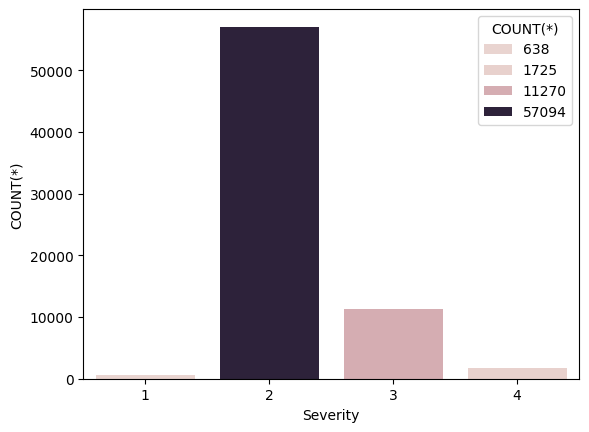

In [31]:
barplot(
    data = data_in_pandas,
    query = '''
        SELECT
            Severity,
            COUNT(*)
        FROM data
        GROUP BY 1
        ORDER BY 1
    ''',
    hue=True)

#### Temperature

<Axes: xlabel='Temperature', ylabel='Count'>

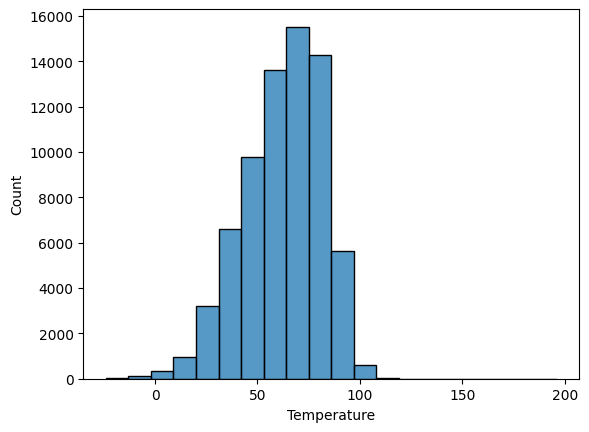

In [46]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Temperature(F)`, 0) AS Temperature
        FROM data
    ''',
    bins = 20)

#### Wind Chill

<Axes: xlabel='Wind_Chill', ylabel='Count'>

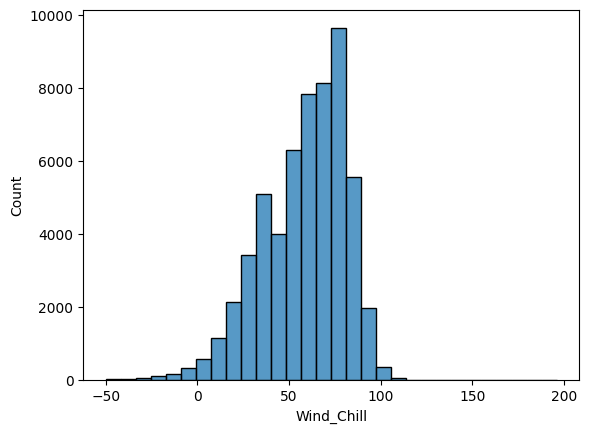

In [47]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Wind_Chill(F)`, 0) AS Wind_Chill
        FROM data
    ''',
    bins = 30)

#### Humidity

<Axes: xlabel='Humidity', ylabel='Count'>

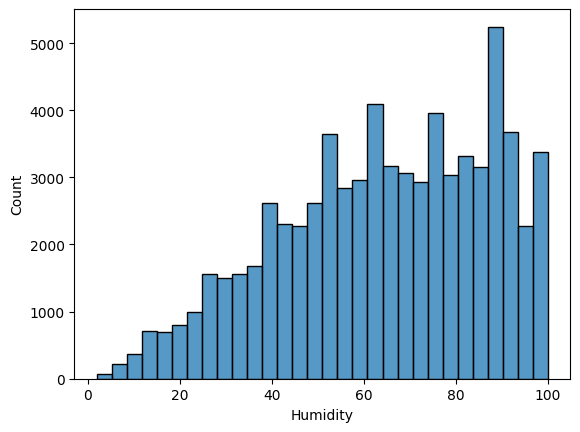

In [48]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Humidity(%)`, 0) AS Humidity
        FROM data
    ''',
    bins = 30)

#### Pressure

<Axes: xlabel='Pressure', ylabel='Count'>

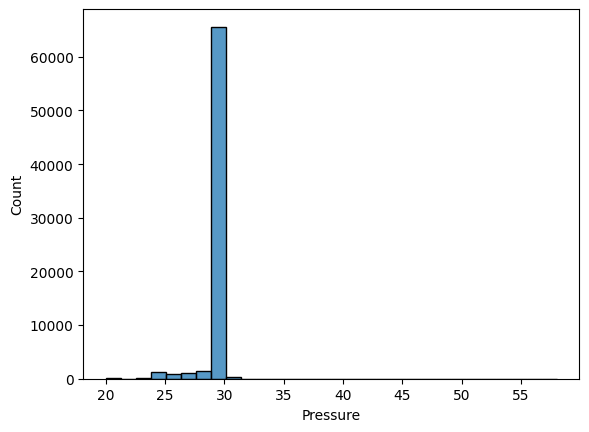

In [53]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Pressure(in)`, 0) AS Pressure
        FROM data
    ''',
    bins = 30)

#### Visibility

<Axes: xlabel='Visibility', ylabel='Count'>

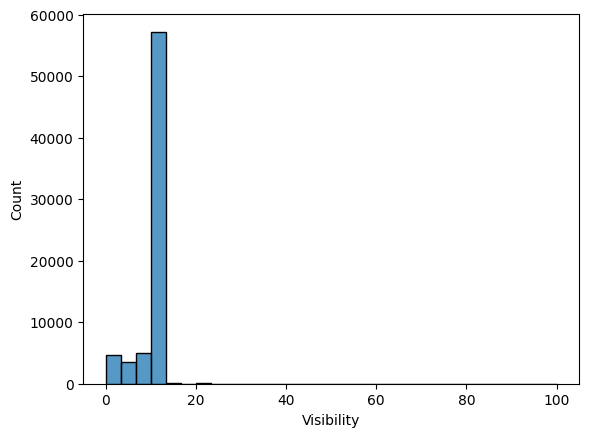

In [55]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Visibility(mi)`, 0) AS Visibility
        FROM data
    ''',
    bins = 30)

#### Wind Direction

<Axes: xlabel='Wind_Direction', ylabel='Count'>

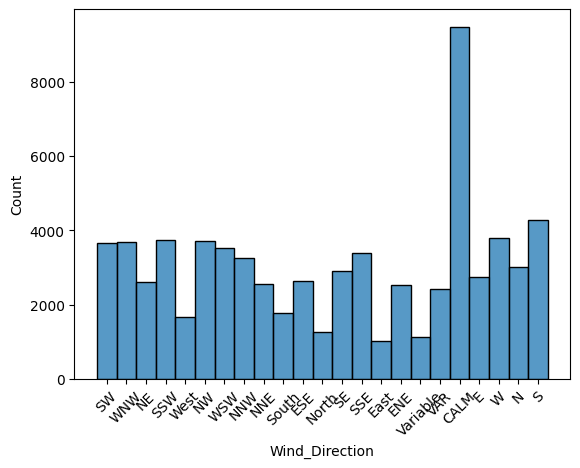

In [66]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Wind_Direction` AS Wind_Direction
        FROM data
    ''',
    bins = 30,
    rotation = 45)

#### Wind Speed

<Axes: xlabel='Wind_Speed', ylabel='Count'>

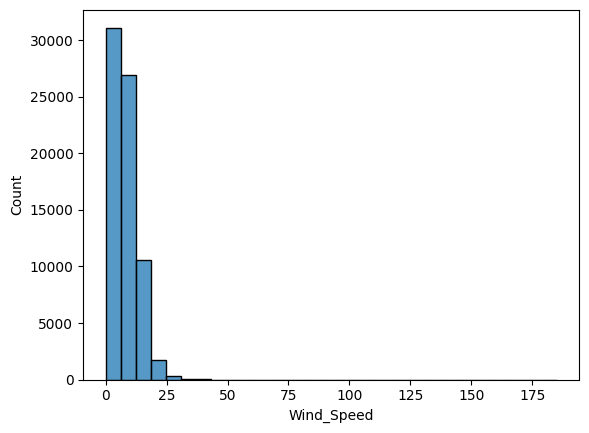

In [68]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Wind_Speed(mph)` AS Wind_Speed
        FROM data
    ''',
    bins = 30)

#### Precipitation

<Axes: xlabel='Precipitation', ylabel='Count'>

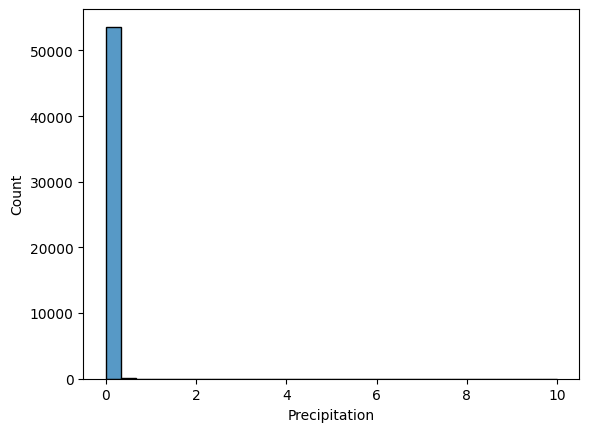

In [71]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Precipitation(in)` AS Precipitation
        FROM data
    ''',
    bins = 30)

#### Weather Condition

<Axes: xlabel='Weather_Condition', ylabel='Count'>

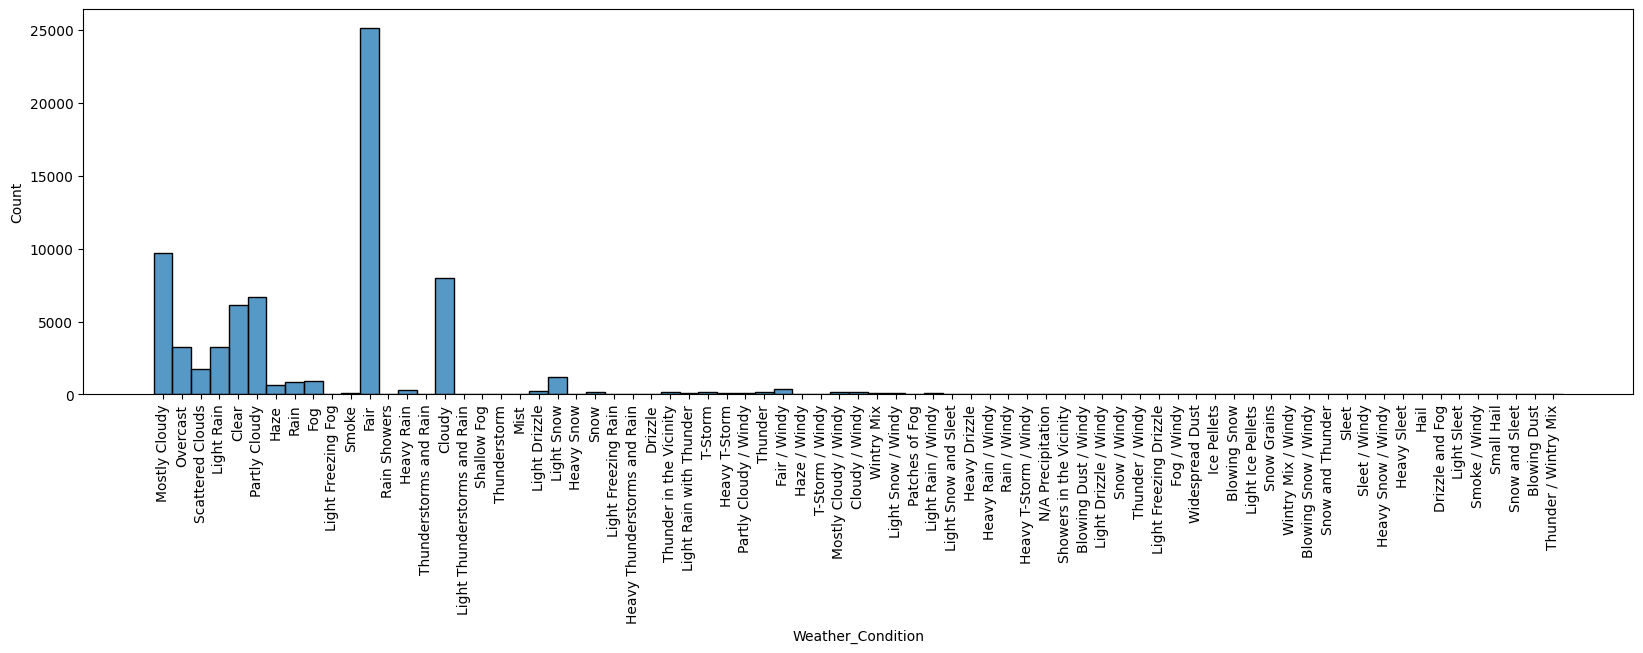

In [77]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Weather_Condition` AS Weather_Condition
        FROM data
    ''',
    bins = 30,
    rotation = 90,
    figsize = (20,5))

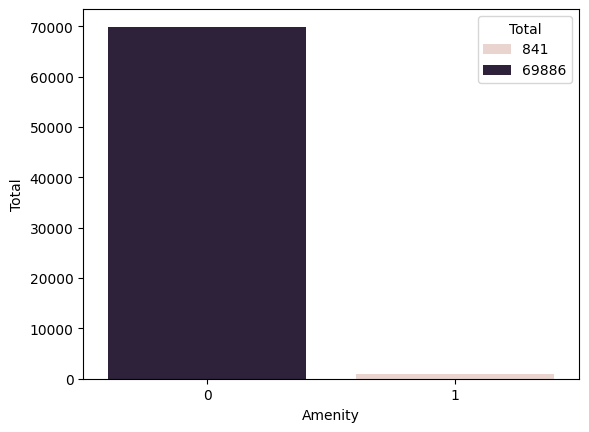

In [79]:
barplot(
    data = data_in_pandas,
    query = '''
        SELECT
            Amenity,
            COUNT(*) aS Total
        FROM data
        GROUP BY 1
        ORDER BY 1
    ''',
    hue=True)

In [84]:
columns_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station', 'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [ ]:
def barplot(data, query, hue=False, rotation = None, figsize = None):

    data = ps.sqldf(query, locals())

    plt.figure(figsize = figsize)
    plt.xticks(rotation = rotation)

    if hue:
        sns.barplot(data=data, x = data[data.columns[0]], y = data[data.columns[-1]], hue = data[data.columns[1]])
    else:
        sns.barplot(data=data, x = data[data.columns[0]], y = data[data.columns[-1]])

In [182]:
n_cols = 4
n_rows = 5
figsize=(20,15)
# columns_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station', 'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
columns_features = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Precipitation(in)']
label = True

def plot_matrix(data, columns_features, n_rows, n_cols, plot, plot_kwargs = {}, loop_feature = None, figsize = (15,15), label = True):

    grid = gridspec.GridSpec(n_rows, n_cols)

    plt.figure(figsize=figsize)

    for r in range(0, n_rows):
        for c in range(0, n_cols ):
            if (c + r*n_cols) >= len(columns_features):
                break
            else:
                feature = columns_features[ (c + r*n_cols) ]

                if loop_feature:
                    plot_kwargs[loop_feature] = feature
                plt.subplot(grid[r, c])
                plt.title(f'{feature}')
                g = plot(data = data, **plot_kwargs)

                if label:
                    for i in g.containers:
                        g.bar_label(i, color = 'black',label_type='edge')
                    else:
                        pass
            
    plt.tight_layout()

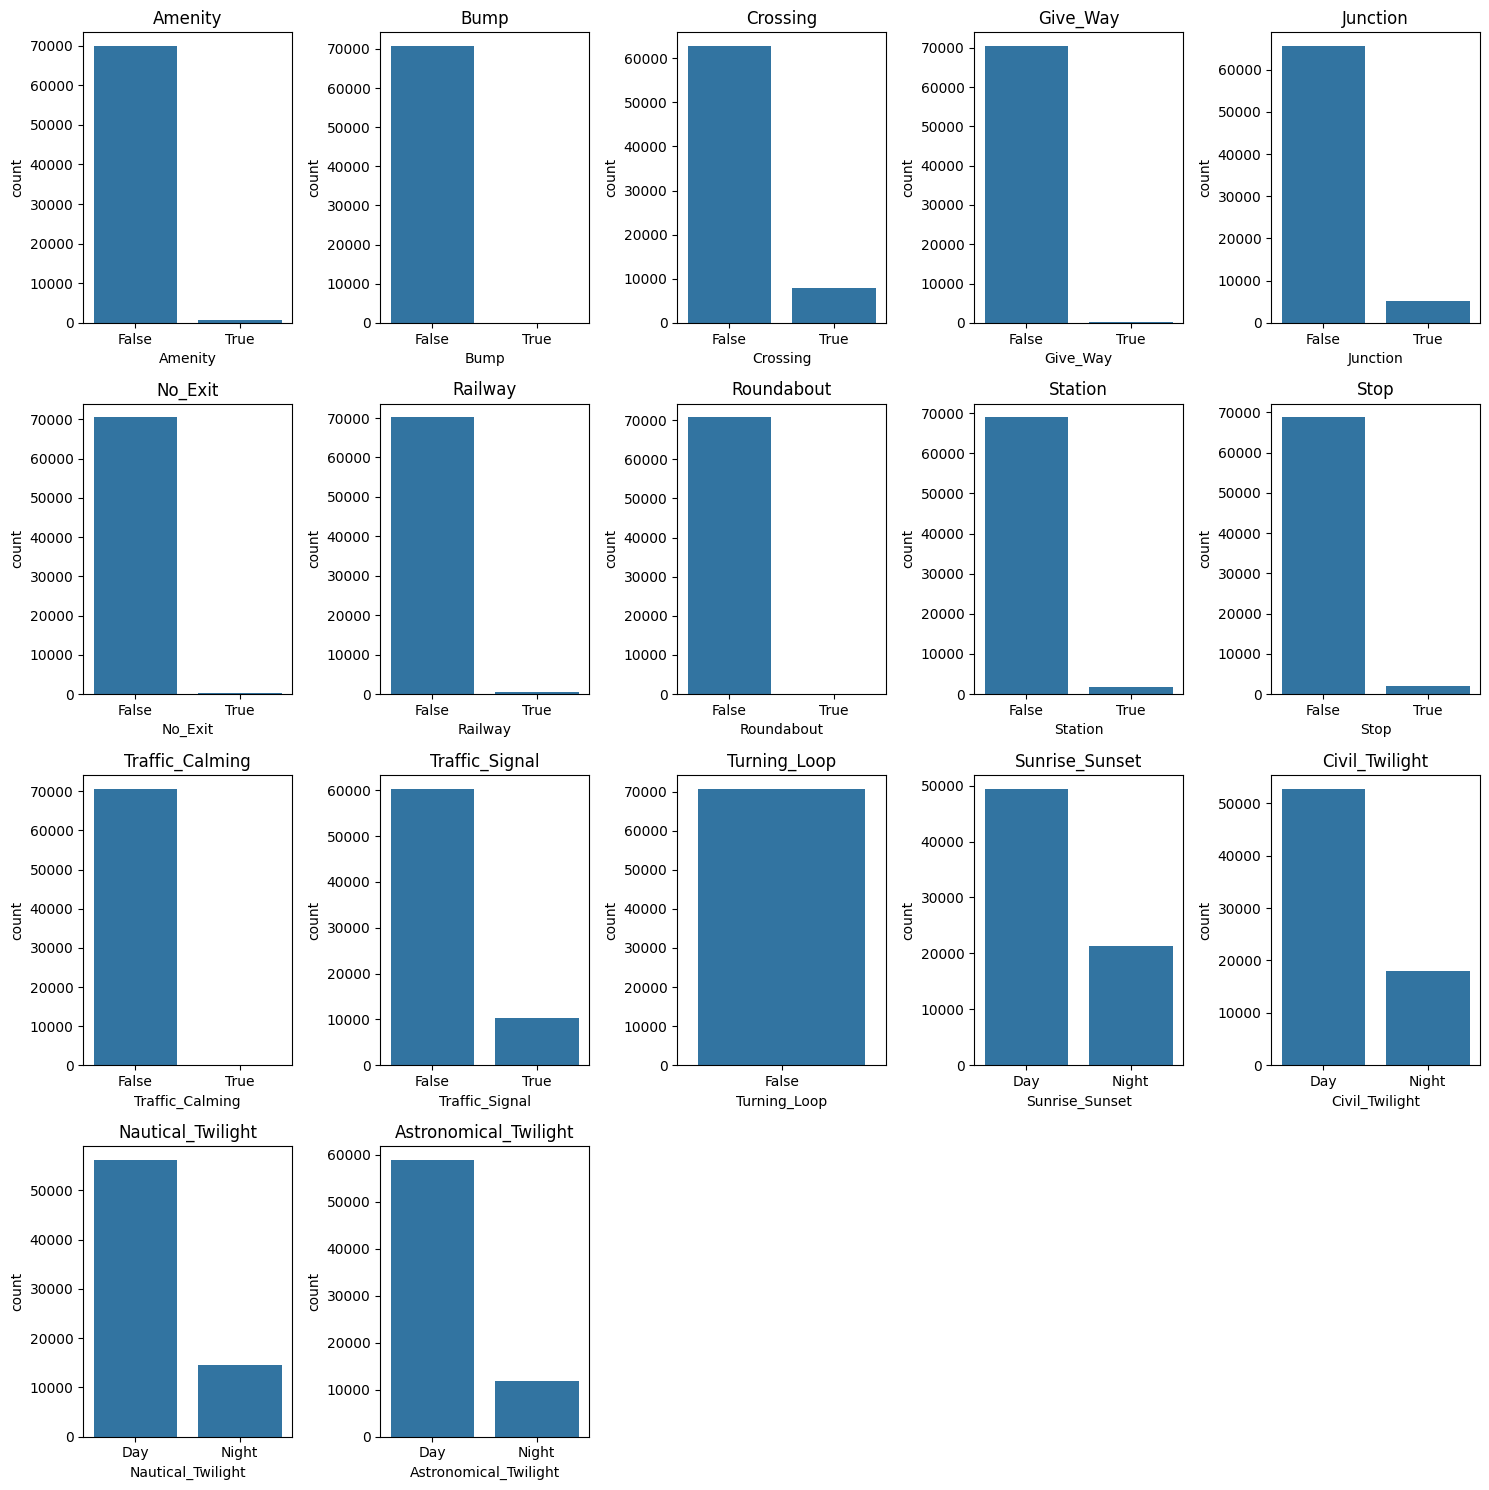

In [183]:
columns_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station', 'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

plot_matrix(data=data_in_pandas, columns_features=columns_features, n_rows = 4, n_cols = 5, plot = sns.countplot, loop_feature = 'x' ,label=False)

### Análise Bivariada

#### Severity

<Axes: xlabel='Temperature', ylabel='Count'>

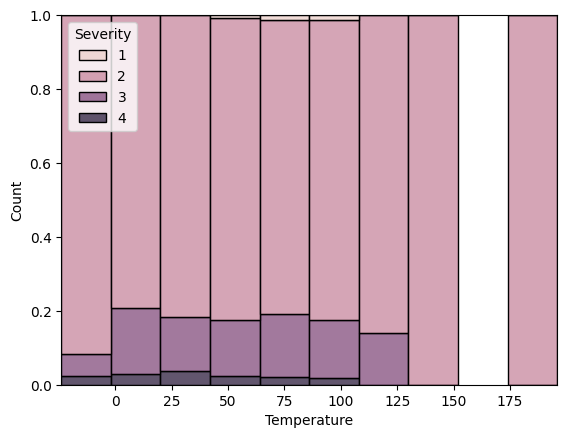

In [45]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Temperature(F)`, 0)AS Temperature,
            Severity
        FROM data
    ''',
    bins = 10,
    hue = True)

#### Wind Chill

<Axes: xlabel='Wind_Chill', ylabel='Count'>

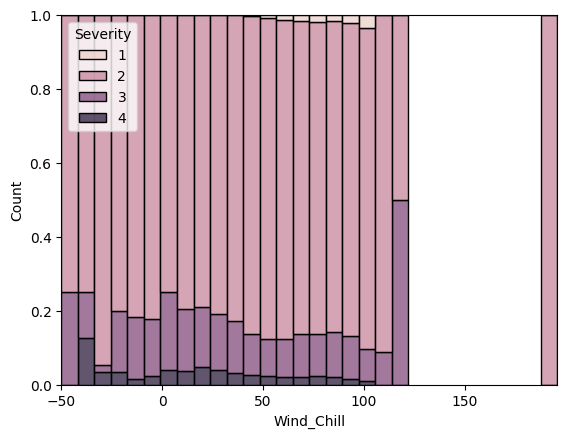

In [50]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Wind_Chill(F)`, 0) AS Wind_Chill,
            Severity
        FROM data
    ''',
    bins = 30,
    hue = True)

#### Humidity

<Axes: xlabel='Humidity', ylabel='Count'>

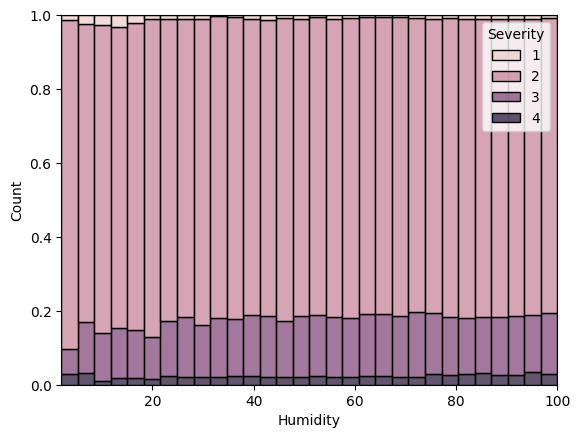

In [51]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Humidity(%)`, 0) AS Humidity,
            Severity
        FROM data
    ''',
    bins = 30,
    hue = True)

#### Pressure

<Axes: xlabel='Pressure', ylabel='Count'>

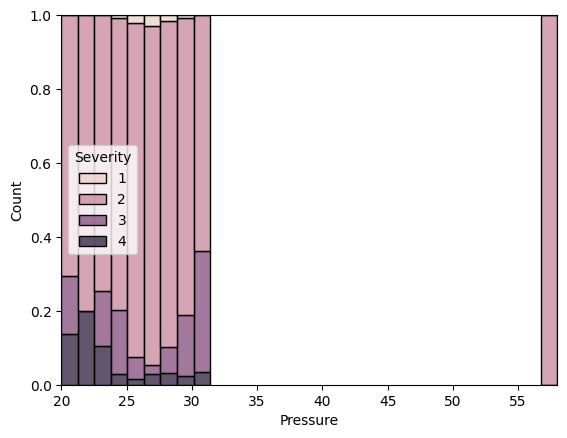

In [54]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Pressure(in)`, 0) AS Pressure,
            Severity
        FROM data
    ''',
    bins = 30,
    hue = True)

#### Visibility

<Axes: xlabel='Visibility', ylabel='Count'>

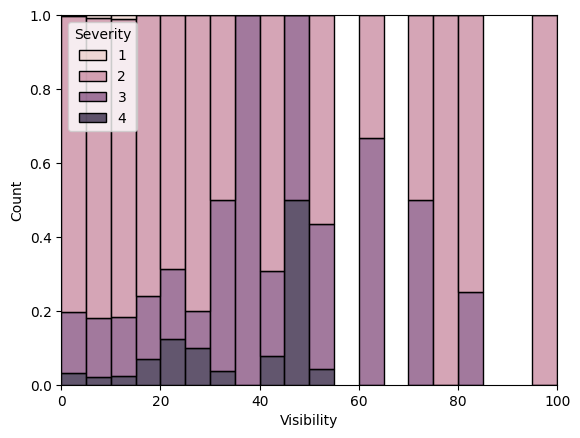

In [59]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            ROUND(`Visibility(mi)`, 0) AS Visibility,
            Severity
        FROM data
    ''',
    bins = 20,
    hue = True)

#### Wind Direction

<Axes: xlabel='Wind_Direction', ylabel='Count'>

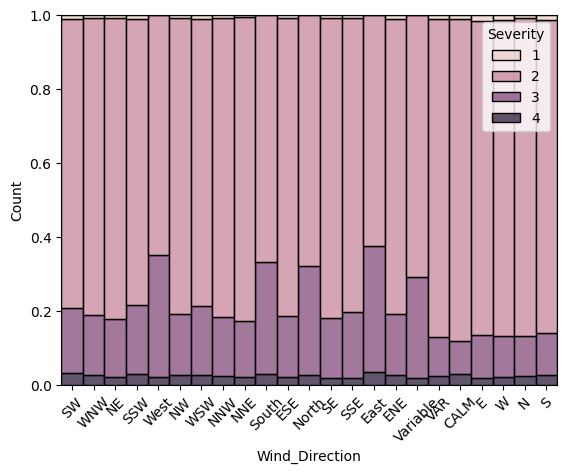

In [65]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Wind_Direction` AS Wind_Direction,
            Severity
        FROM data
    ''',
    bins = 30,
    hue = True,
    rotation =  45)

#### Wind Speed

<Axes: xlabel='Wind_Speed', ylabel='Count'>

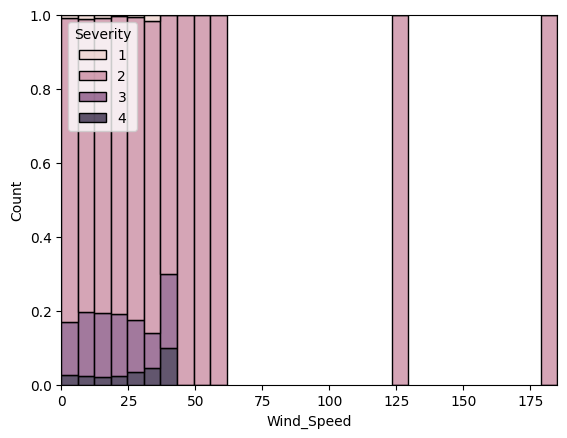

In [69]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Wind_Speed(mph)` AS Wind_Speed,
            Severity
        FROM data
    ''',
    bins = 30,
    hue = True)

#### Precipitation

<Axes: xlabel='Precipitation', ylabel='Count'>

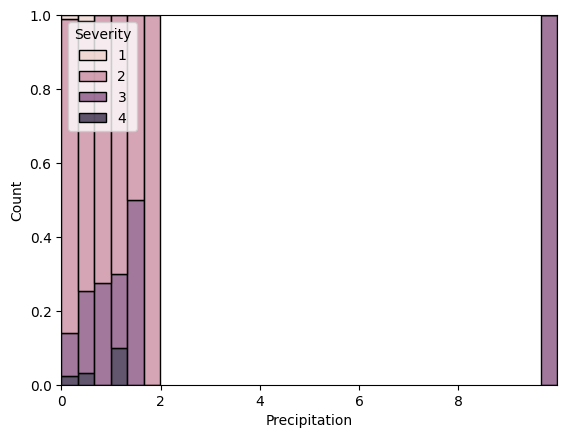

In [72]:
histplot(
    data = data_in_pandas,
    query = '''
        SELECT
            `Precipitation(in)` AS Precipitation,
            Severity
        FROM data
    ''',
    hue = True,
    bins = 30)

#### Weather Condition

In [24]:
potencial_columns = [
'ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Zipcode',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'
 ]

## Feature Engeneering

In [40]:
sampled_select_columns = sampled_df.select(*potencial_columns)

In [52]:
# Extrai o dia da semana
sampled_select_columns = sampled_select_columns.withColumn("day_of_week", date_format(col("Start_Time"), "F"))

# Extrai a hora do dia
sampled_select_columns = sampled_select_columns.withColumn("hour_of_day", hour(col("Start_Time")))

In [53]:
sampled_select_columns.show()

+-----+--------+-------------------+-------------------+----------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+-----------+-----------+
|   ID|Severity|         Start_Time|           End_Time|   Zipcode|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|day_of_week|hour_of_day|
+-----+--------+-------------------+-------------------+----------+-------------------+--------------+----------

## Separação do Treino e Teste

## Preparar os Dados de Treino
- Transformar as categorias 
- Padronizar, normalizar e etc

## Preparar os Dados de Teste

## Testar os Modelos

- SVM
- KNN
- Random Forest 

## Avaliar Modelo
- Cross Validation

## Avaliar o melhor modelo